In [20]:
# install dependencies
!pip install forcelayout
!pip install ffmpeg

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=b04023948e7478ddb10d945ab93b31aea0dbcf2bd8835a5053ce9ea67e8adf5a
  Stored in directory: c:\users\mark\appdata\local\pip\cache\wheels\1d\57\24\4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [11]:
import matplotlib.pyplot as plt
import forcelayout as fl
import numpy as np
import os

def load_file(name, dtype):
    with open(f'{name}', encoding='utf8') as data_file:
        return np.loadtxt(
            data_file,
            skiprows=1,
            delimiter=',',
            dtype=dtype,
            comments='#'
        )


def load_poker(size):
    return load_file(f'poker{size}.csv', np.int16)


suits = ['♣', '♦', '♥', '♠']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', ]
cards = []
for suit in suits:
    for rank in ranks:
        cards.append(rank + suit)

hand_classes = [
    'High Card',
    'Pair',
    'Two pair',
    'Three of a kind',
    'Straight',
    'Flush',
    'Full house',
    'Four of a kind',
    'Straight flush',
    'Royal flush',
]
# cards = ['🃑', '🃒', '🃓', '🃔', '🃕', '🃖', '🃗', '🃘', '🃙', '🃚', '🃛', '🃝', '🃞',
#          '🃁', '🃂', '🃃', '🃄', '🃅', '🃆', '🃇', '🃈', '🃉', '🃊', '🃋', '🃍', '🃎',
#          '🂱', '🂲', '🂳', '🂴', '🂵', '🂶', '🂷', '🂸', '🂹', '🂺', '🂻', '🂽', '🂾',
#          '🂡', '🂢', '🂣', '🂤', '🂥', '🂦', '🂧', '🂨', '🂩', '🂪', '🂫', '🂭', '🂮']



def grouped(iterable, n):
    return zip(*[iter(iterable)]*n)


def annotate_poker(node, i):
    def card(suit, rank):
        return cards[((suit-1)*13) + rank - 1]

    arr = node.datapoint
    hand = []
    for s, r in grouped(arr[:10], 2):
        hand.append(card(s, r))
    if (len(arr) > 10):
        hand.append(hand_classes[arr[10]])
    return ' '.join(hand)


def poker_distance(h1, h2):
    """
    similarity metric between two poker hands
    """
    ranks = range(0, 9, 2)
    suits = range(1, 10, 2)

    h1_ranks = h1[ranks]
    h2_ranks = h2[ranks]
    h1_ranks.sort()
    h2_ranks.sort()

    rank_diff = abs(sum(h2_ranks - h1_ranks)) / 75

    h1_suits = h1[suits]
    h2_suits = h2[suits]
    h1_suits.sort()
    h2_suits.sort()

    suit_diff = 1
    i = j = 0
    while i < 5 and j < 5:
        comp = h2_suits[j] - h1_suits[i]
        if comp == 0:
            suit_diff -= 0.2
            i += 1
            j += 1
        elif comp < 0:
            j += 1
        else:
            i += 1

    class_diff = abs(h1[10] - h2[10])
    return rank_diff + suit_diff + class_diff

In [12]:
#from poker_utils import load_poker, annotate_poker, poker_distance
import matplotlib.pyplot as plt
import forcelayout as fl

dataset = load_poker(500)

The form of a single poker hand in the poker hands dataset:

In [13]:
dataset[0]

array([ 1,  1,  1, 13,  2,  4,  2,  3,  1, 12,  0], dtype=int16)

Create a layout using the Pivot Layout algorithm and the poker distance metric:

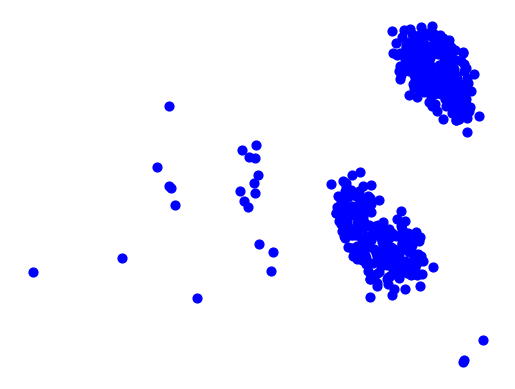

In [14]:
fl.draw_spring_layout(dataset, algorithm=fl.Pivot, distance=poker_distance)
plt.show()

Let's colour this by the class of the poker hand...

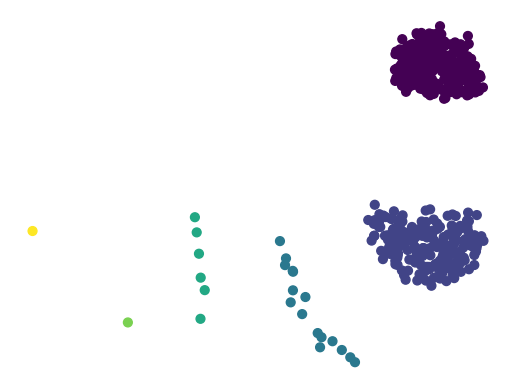

In [17]:
layout = fl.draw_spring_layout(dataset, algorithm=fl.Pivot, distance=poker_distance,
                               color_by=lambda datapoint: datapoint[10])

We can redraw a layout as many times as we want with different settings

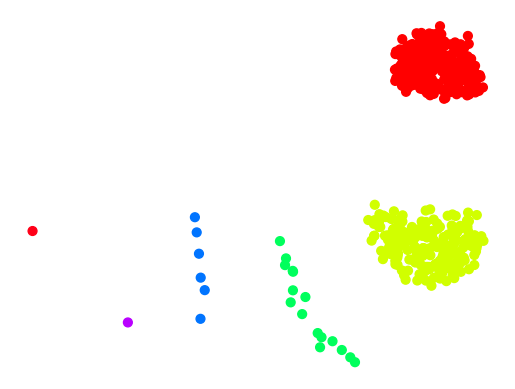

In [18]:
draw = fl.DrawLayout(dataset, layout)
draw.draw(color_by=lambda datapoint: datapoint[10], color_map='hsv')

Create an animation of the Chalmers' 1996 algorithm: (this will take longer than the Pivot algorithm)

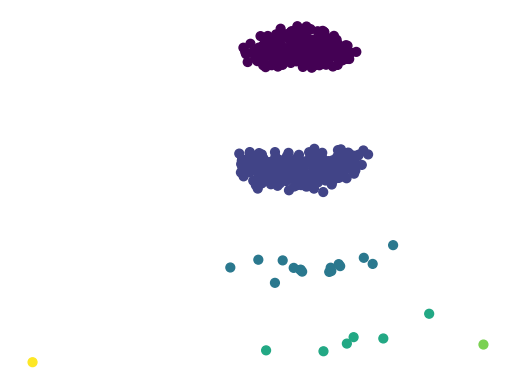

In [22]:
from IPython.display import HTML


ani = fl.draw_spring_layout_animated(dataset, distance=poker_distance, interval=100,
                                     color_by=lambda datapoint: datapoint[10])
HTML(ani.to_html5_video())

We can animate the Pivot algorithm too:

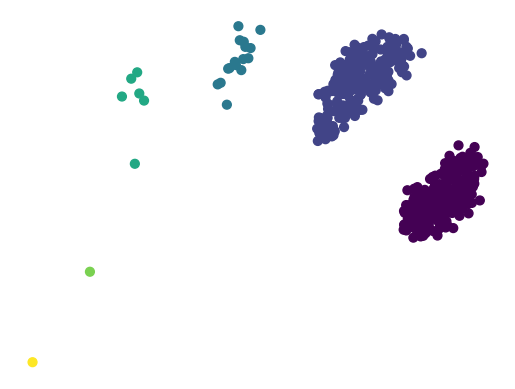

In [23]:
ani = fl.draw_spring_layout_animated(dataset, algorithm=fl.Pivot, distance=poker_distance, interval=100,
                                     color_by=lambda datapoint: datapoint[10])
HTML(ani.to_html5_video())

How about a big layout, 10,000?

In [24]:
import time
big_poker = load_poker(10000)

start = time.time()
layout = fl.draw_spring_layout(big_poker, algorithm=fl.Pivot, distance=poker_distance,
                               hybrid_refine_layout_iterations=0, size=10,
                               color_by=lambda datapoint: datapoint[10])
print(f'\ntime: {time.time() - start}s')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'poker10000.csv'

Every poker hand: 2.5 million (**warning** will take several hours)

In [ ]:
bigger_poker = load_poker(2500000)

start = time.time()
layout = fl.draw_spring_layout(bigger_poker, algorithm=fl.Pivot, distance=poker_distance,
                               hybrid_refine_layout_iterations=0, size=0.5,
                               color_by=lambda datapoint: datapoint[10])
print(f'\ntime: {time.time() - start}s')
plt.show()